In [1]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

 # Data collection and analysis

In [2]:
# reading the "Diabetes_dataset.csv" file and viewing it

In [3]:
diabetes_dataset = pd.read_csv("diabetes_data.csv")

In [84]:
#Printing 5 first rows of dataset
diabetes_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
diabetes_dataset.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# display randomly any number of records of data
diabetes_dataset.sample()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
319,34,Female,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative


In [8]:
diabetes_dataset.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
#Number of rows and columns in the dataset

diabetes_dataset.shape

(520, 17)

In [10]:
# list the types of all colums
diabetes_dataset.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [11]:
diabetes_dataset.Age.unique()

array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62,
       39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25,
       47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26],
      dtype=int64)

In [12]:
#Getting the statistical measure of the data

diabetes_dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [13]:
bins= [15,30,45,60,75]
labels = ['15-30','30-45','45-60','60-75']
diabetes_dataset['AgeGroup'] = pd.cut(diabetes_dataset['Age'], bins=bins, labels=labels, right=False)


In [14]:
positive_group = diabetes_dataset[diabetes_dataset['class']=='Positive']
negative_group = diabetes_dataset[diabetes_dataset['class']=='Negative']


In [15]:
positive_group.groupby('AgeGroup').size()

AgeGroup
15-30      8
30-45    110
45-60    136
60-75     61
dtype: int64

In [16]:
negative_group.groupby('AgeGroup').size()

AgeGroup
15-30    12
30-45    83
45-60    76
60-75    29
dtype: int64

In [17]:
#Checking the number of diabetic and non diabetic people

diabetes_dataset['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

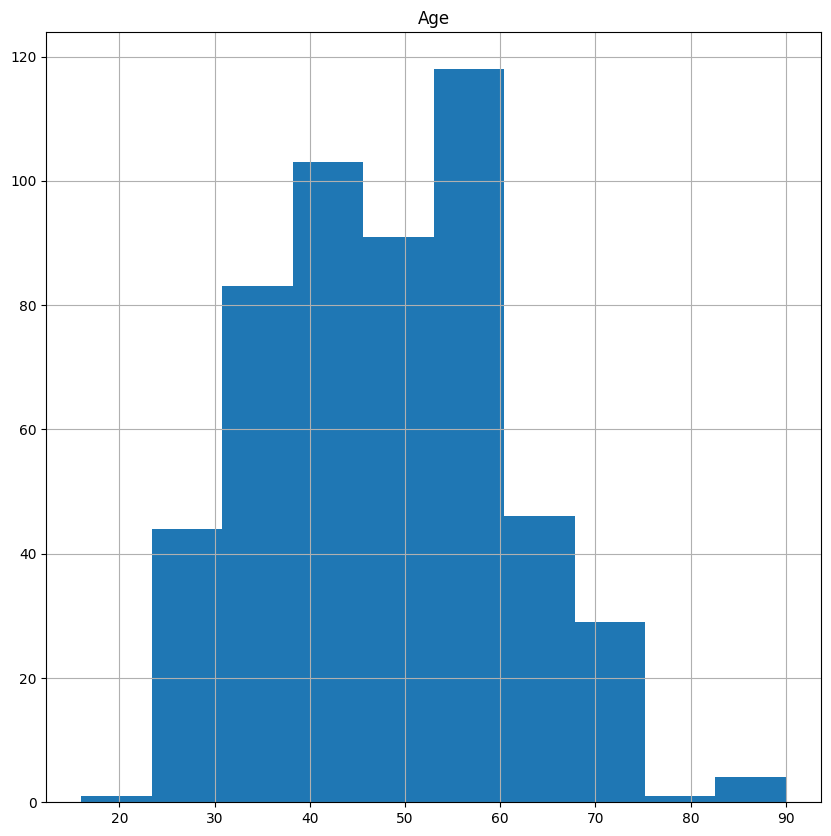

In [19]:
# Histogram of each feature
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Percentage of People with Diabetic and Non-Diabetic')

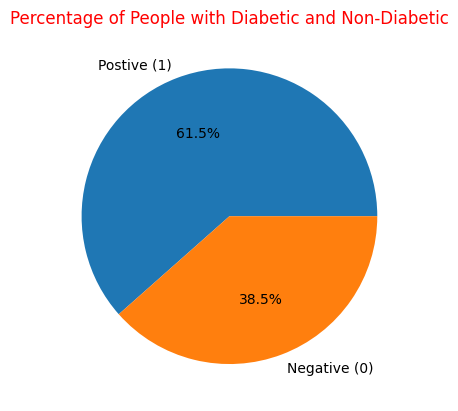

In [20]:
# pie-chart pecentage of diabetic/non-diabetic
plt.pie(diabetes_dataset['class'].value_counts(),labels=['Postive (1)', 'Negative (0)'],autopct='%1.1f%%')
plt.title('Percentage of People with Diabetic and Non-Diabetic', color='red')

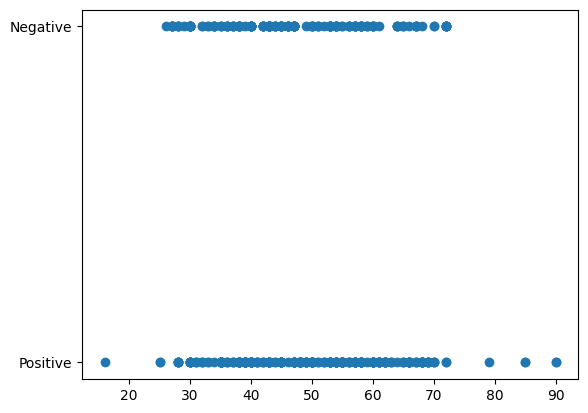

In [22]:
#scatter plot matrix
#from pandas.plotting import scatter_matrix
#scatter_matrix(diabetes_dataset, figsize= (20,20));


plt.scatter('Age', 'class', data=diabetes_dataset);

                             

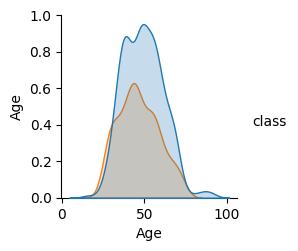

In [23]:
#pairplot

sns.pairplot(data = diabetes_dataset, hue = 'class')
plt.show()

In [24]:
#sns.catplot(x="class", y="Age", hue="Gender",kind="box", data=diabetes_dataset)



C:\Users\amgad\AppData\Local\Temp\ipykernel_9360\1355173332.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = diabetes_dataset.corr()


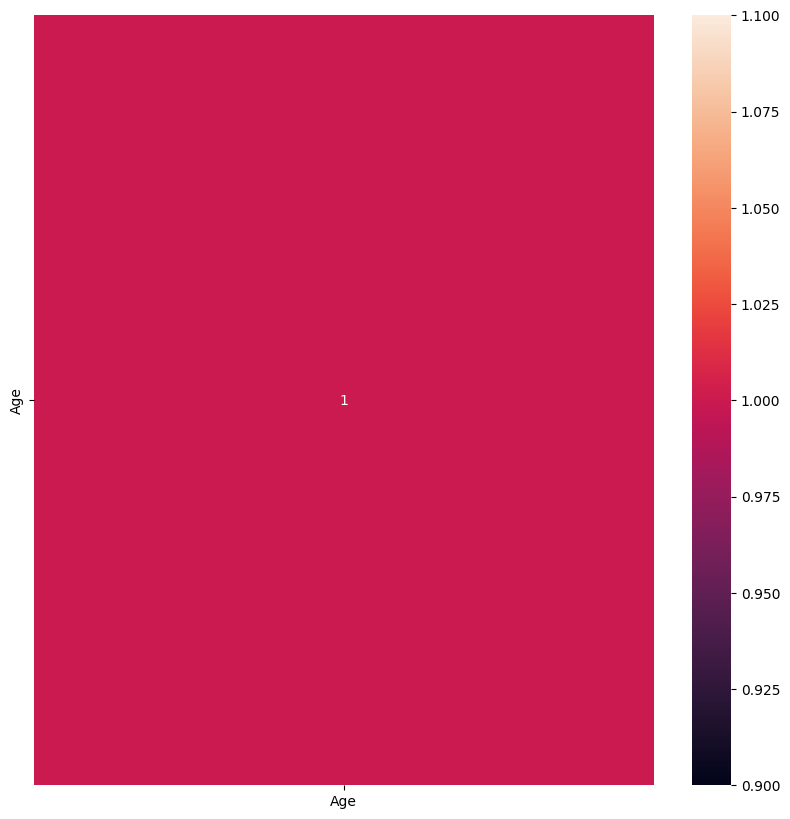

In [25]:
# Corelation analysis

corrmat = diabetes_dataset.corr()
top_corr_features = corrmat.index
plt.figure( figsize = (10,10))

#plot heatmap

g = sns.heatmap(diabetes_dataset[top_corr_features].corr(), annot=True)

In [26]:
#Getting the mean of each variable in the dataset using the "class" variable
diabetes_dataset.groupby('class').mean()

C:\Users\amgad\AppData\Local\Temp\ipykernel_9360\1019146393.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diabetes_dataset.groupby('class').mean()


,Age
class,
Negative,46.360000
Positive,49.071875


In [4]:
#Separating the data and labels

X = diabetes_dataset.drop(columns = 'class', axis = 1)
Y = diabetes_dataset['class']

In [81]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm

In [6]:


X_category = X[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
age_column = X['Age']

In [7]:
age_column

0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 520, dtype: int64

In [8]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_OH = pd.DataFrame(OH_encoder.fit_transform(X_category))
X_OH.index = X_category.index #One-hot encoding removes the index so it's necessary to put them back


In [9]:
X_OH.insert(0, 'Age', age_column.values)

In [10]:
X_OH

,Age,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,40,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,58,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,41,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
516,48,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
517,58,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
518,32,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [11]:
X = X_OH.values
Y = diabetes_dataset['class']

In [12]:
X_OH.shape

(520, 31)

In [13]:
# Data Partiotioning/ data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.01, stratify= Y, random_state = 2)


In [14]:
#The data split has given x_test = 412 and _train = 104
print(X.shape, X_train.shape, X_test.shape)

(520, 31) (514, 31) (6, 31)


# Building the model
# Create a Decision Tree Classifier

In [15]:
import pickle

In [16]:
clf =svm.SVC(kernel='linear') # Linear Kernel

# Train the model with training data

In [17]:
clf = clf.fit(X_train, Y_train)

In [18]:
#Model Evaluation

# Accuracy Score on the training data

X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100

In [19]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 

In [75]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9230769230769231


In [ ]:
input = {'Age':25,'Gender':"Male",'Polyuria':'NO','Polydipsia':Polydipsia,'sudden weight loss':sudden_weight_loss,'weakness':weakness,'Polyphagia':Polyphagia,'Genital thrush':Genital_thrush,'visual blurring':visual_blurring,'Itching':Itching,'Irritability':Irritability,'delayed healing':delayed_healing,'partial paresis':partial_paresis,'muscle stiffness':muscle_stiffness,'Alopecia':Alopecia,'Obesity':Obesity}
df_input = pd.DataFrame(input,index=[0])
input_oh = OH_encoder.transform(df_input)

In [20]:
print('Accuracy Score of the training data : ',training_data_accuracy)

Accuracy Score of the training data :  94.16342412451361


In [112]:
# Accuracy Score on the test data

X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100



C:\Users\amgad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [113]:
print('Accuracy Score of the test data : ',test_data_accuracy)

Accuracy Score of the test data :  90.38461538461539


# Our model score on the test dataset is 91%. So our model is around 91% accurate in calculating whether the person is likely to be diabetic or not on an unseen data.